<a href="https://colab.research.google.com/github/suryakokkiligadda2003/Python-mini-projects/blob/main/Retail_transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Data Loading & Parsing
import pandas as pd  # Importing pandas library

# Read the CSV file into a DataFrame
df = pd.read_csv("/retail_transactions.csv", parse_dates=["TransactionDate"])

# Step 2: Initial Data Exploration
print("First 15 rows of the DataFrame:")
print(df.head(15))  # Display first 15 rows

print("\nDataFrame Info:")
print(df.info())  # Summary of dataset including data types and missing values

print("\nDescriptive Statistics:")
print(df.describe())  # Summary statistics for numerical columns

# Step 3: Data Cleaning
# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Ensure Quantity, Price, and Discount are numeric
df["Quantity"] = pd.to_numeric(df["Quantity"], errors="coerce")
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
df["Discount"] = pd.to_numeric(df["Discount"], errors="coerce")

# Fill missing discounts with 0%
df["Discount"].fillna(0, inplace=True)

# Step 4: Feature Engineering
df["NetPrice"] = df["Price"] * (1 - df["Discount"] / 100)  # Apply discount
df["TotalSale"] = df["Quantity"] * df["NetPrice"]  # Compute total sale

# Step 5: Data Filtering (TotalSale >= 20)
filtered_df = df[df["TotalSale"] >= 20]

# Step 6: Data Type Conversion
filtered_df["PaymentType"] = filtered_df["PaymentType"].astype("category")

# Step 7: Grouping and Aggregation
# Group by ProductCategory and calculate total Quantity and TotalSale
category_sales = (
    filtered_df.groupby("ProductCategory")[["Quantity", "TotalSale"]]
    .sum()
    .sort_values(by="TotalSale", ascending=False)
)

print("\nTotal Sales and Quantity per Product Category:")
print(category_sales)

# Identify top 3 product categories by TotalSale
top_3_categories = category_sales.head(3)
print("\nTop 3 Product Categories by Total Sales:")
print(top_3_categories)

# Step 8: Multi-Level Grouping (StoreID & ProductCategory)
store_product_sales = (
    filtered_df.groupby(["StoreID", "ProductCategory"])["TotalSale"].mean()
    .reset_index()
    .rename(columns={"TotalSale": "AvgTotalSale"})
)

print("\nAverage Total Sale per Transaction (Grouped by Store and Product Category):")
print(store_product_sales)

# Step 9: Store-Level Insights
# Determine highest AvgTotalSale product category per store
store_top_category = (
    store_product_sales.loc[
        store_product_sales.groupby("StoreID")["AvgTotalSale"].idxmax()
    ]
)

print("\nTop Product Category by Store (Highest Avg TotalSale):")
print(store_top_category)

# Step 10: Documentation (Code is well-commented throughout)

First 15 rows of the DataFrame:
   TransactionID TransactionDate  StoreID  CustomerID  ProductID  \
0           T001      2024-01-01      102        1646        545   
1           T002      2024-01-02      103        1226        542   
2           T003      2024-01-03      102        1515        593   
3           T004      2024-01-04      103        1793        560   
4           T005      2024-01-05      105        1864        523   
5           T006      2024-01-06      103        1836        515   
6           T007      2024-01-07      103        1983        586   
7           T008      2024-01-08      101        1806        569   
8           T009      2024-01-09      101        1925        548   
9           T010      2024-01-10      101        1711        565   
10          T011      2024-01-11      103        1276        565   
11          T012      2024-01-12      101        1486        523   
12          T013      2024-01-13      103        1597        516   
13          T014

<ipython-input-5-95ccdf95b9b5>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Discount"].fillna(0, inplace=True)


In [ ]:
transactions = [100, 250, 300, 150, 400]  # Example transaction amounts
average_transaction = sum(transactions) / len(transactions)
print("Average Transaction Amount:", average_transaction)

Average Transaction Amount: 240.0


In [ ]:
from collections import Counter

transactions = ["Product A", "Product B", "Product A", "Product C", "Product A", "Product B"]
product_counts = Counter(transactions)
most_frequent_product = product_counts.most_common(1)[0]

print("Most Frequently Purchased Product:", most_frequent_product[0], "with", most_frequent_product[1], "purchases")

Most Frequently Purchased Product: Product A with 3 purchases


In [ ]:
df

,TransactionID,TransactionDate,StoreID,CustomerID,ProductID,ProductCategory,Quantity,Price,PaymentType,Discount,NetPrice,TotalSale
0,T001,2024-01-01,102,1646,545,Electronics,1,150,Credit,15.0,127.50,127.50
1,T002,2024-01-02,103,1226,542,Toys,2,317,Debit,10.0,285.30,570.60
2,T003,2024-01-03,102,1515,593,Electronics,5,165,Debit,0.0,165.00,825.00
3,T004,2024-01-04,103,1793,560,Furniture,6,496,Debit,10.0,446.40,2678.40
4,T005,2024-01-05,105,1864,523,Grocery,10,166,Debit,0.0,166.00,1660.00
...,...,...,...,...,...,...,...,...,...,...,...,...
95,T096,2024-04-05,101,1918,559,Apparel,2,439,Cash,10.0,395.10,790.20
96,T097,2024-04-06,104,1190,579,Electronics,4,52,Debit,0.0,52.00,208.00
97,T098,2024-04-07,102,1932,504,Apparel,7,151,Credit,10.0,135.90,951.30
98,T099,2024-04-08,103,1285,587,Apparel,5,479,Credit,10.0,431.10,2155.50


In [ ]:
df.shape

(100, 12)

<Axes: >

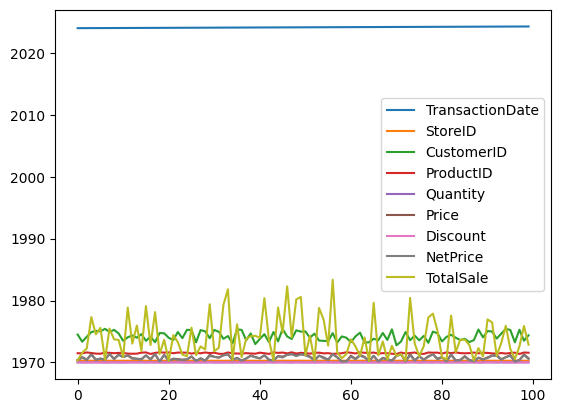

In [13]:
df.plot()